In [1]:
import pandas as pd


In [5]:
loan_df = pd.read_csv("loan_approval_dataset.csv")

In [9]:
print("Shape:", loan_df.shape)
print(loan_df.head())


Shape: (4269, 13)
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0       

In [103]:
loan_df = loan_df.drop(columns=['loan_id'])  


In [105]:
cat_cols = loan_df.select_dtypes(include='object').columns

for col in cat_cols:
    loan_df[col] = loan_df[col].str.strip()


In [17]:
loan_df = loan_df.dropna(subset=[' loan_status'])


In [19]:
print(loan_df.isnull().sum())


no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [21]:
loan_df.isnull().sum()


no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [25]:
print(loan_df.columns.tolist())


[' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [27]:
loan_df[' education'] = loan_df[' education'].map({'Graduate': 1, 'Not Graduate': 0})
loan_df[' self_employed'] = loan_df[' self_employed'].map({'Yes': 1, 'No': 0})
loan_df[' loan_status'] = loan_df[' loan_status'].map({'Approved': 1, 'Rejected': 0})


In [29]:
loan_df[[' education', ' self_employed', ' loan_status']].head()


,education,self_employed,loan_status
0,1,0,1
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0


In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

loan_df = pd.read_csv('C:/Users/user5/Downloads/loan_approval_dataset.csv')
loan_df.columns = loan_df.columns.str.strip().str.lower()
print(loan_df.columns.tolist())

numeric_cols = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                'residential_assets_value', 'commercial_assets_value',
                'luxury_assets_value', 'bank_asset_value']

scaler = StandardScaler()
loan_df[numeric_cols] = scaler.fit_transform(loan_df[numeric_cols])

['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [35]:
X = loan_df.drop(columns=['loan_status', 'loan_id'])
y = loan_df['loan_status']


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


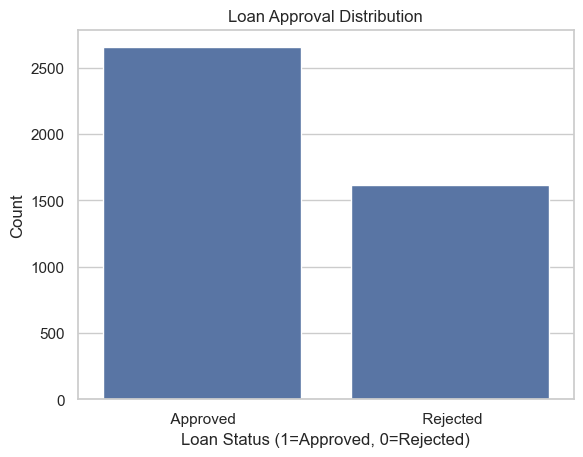

In [39]:
sns.countplot(data=loan_df, x='loan_status')
plt.title("Loan Approval Distribution")
plt.xlabel("Loan Status (1=Approved, 0=Rejected)")
plt.ylabel("Count")
plt.show()


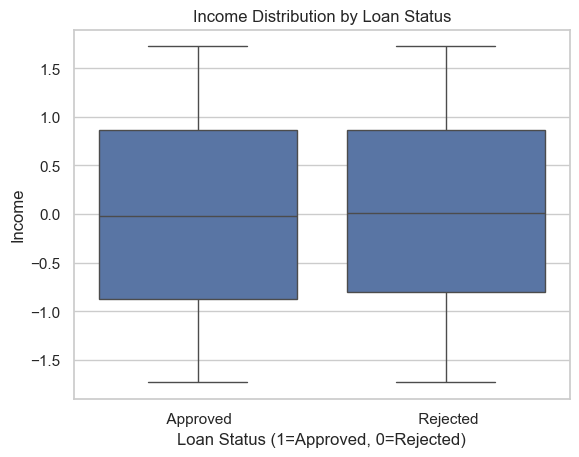

In [41]:
sns.boxplot(data=loan_df, 
x='loan_status', y='income_annum')
plt.title("Income Distribution by Loan Status")
plt.xlabel("Loan Status (1=Approved, 0=Rejected)")
plt.ylabel("Income")
plt.show()


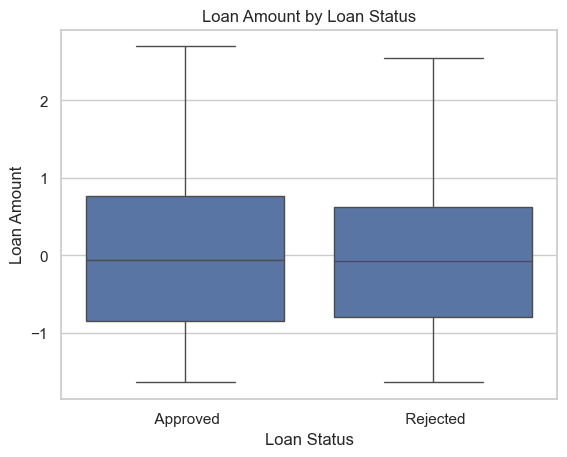

In [43]:
sns.boxplot(data=loan_df, x='loan_status', y='loan_amount')
plt.title("Loan Amount by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.show()


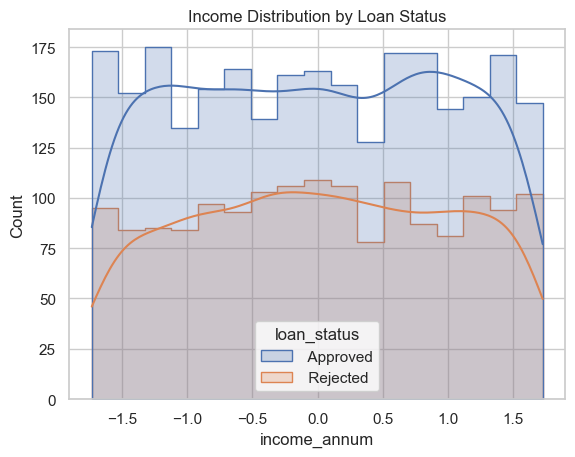

In [45]:
sns.histplot(data=loan_df, x='income_annum', hue='loan_status', kde=True, element='step')
plt.title("Income Distribution by Loan Status")
plt.show()

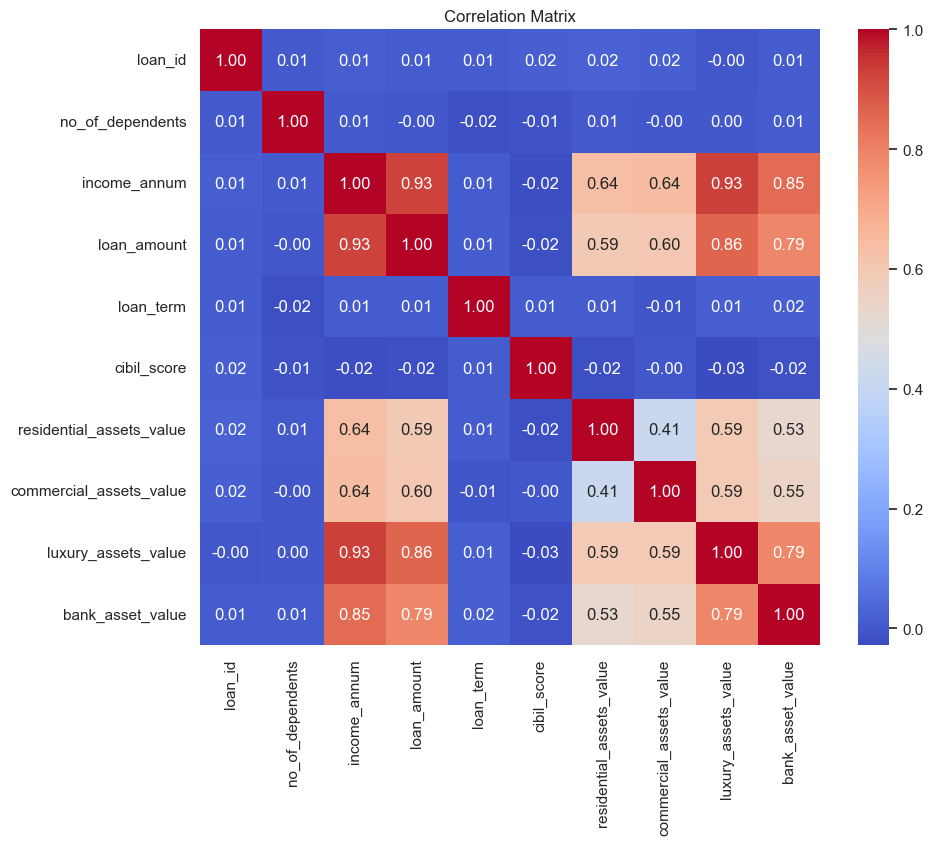

In [47]:
numeric_df = loan_df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [49]:
X_encoded = pd.get_dummies(X, drop_first=True)


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [53]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [61]:
y_pred = log_model.predict(X_test)


In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np


In [79]:
print("y_test values:", y_test.unique())
print("y_pred values:", np.unique(y_pred))


y_test values: [' Rejected' ' Approved']
y_pred values: [' Approved' ' Rejected']


In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Evaluate metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=" Approved"))
print("Recall:", recall_score(y_test, y_pred, pos_label=" Approved"))

# AUC (use probabilities)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]
print("AUC Score:", roc_auc_score(y_test == " Approved", y_pred_proba))



Accuracy: 0.905152224824356
Precision: 0.9205175600739371
Recall: 0.9291044776119403
AUC Score: 0.03248498075659439


In [89]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.9765807962529274
Classification Report:
               precision    recall  f1-score   support

    Approved       0.98      0.99      0.98       536
    Rejected       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



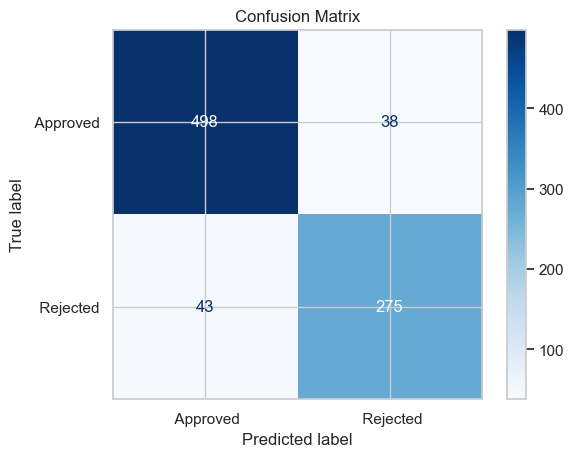

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=[" Approved", " Rejected"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[" Approved", " Rejected"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [93]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=[" Approved", " Rejected"]))


Classification Report:
              precision    recall  f1-score   support

    Approved       0.92      0.93      0.92       536
    Rejected       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854



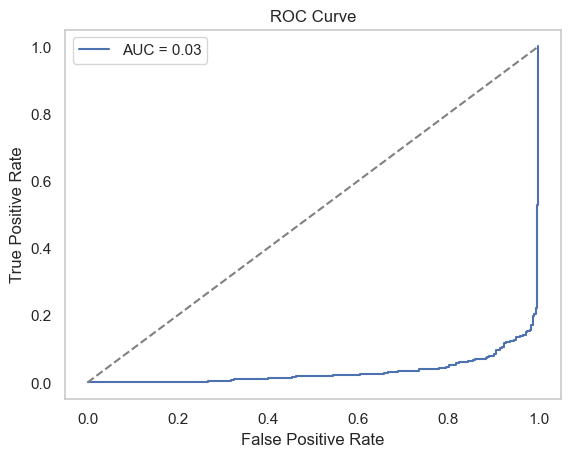

In [101]:
from sklearn.metrics import roc_curve, roc_auc_score
y_test_binary = (y_test == " Approved").astype(int)
y_pred_prob = log_model.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob)
auc_score = roc_auc_score(y_test_binary, y_pred_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


Top 10 important features:
cibil_score                -4.176312
income_annum                1.618780
loan_amount                -1.260970
loan_term                   0.863213
luxury_assets_value        -0.274222
self_employed_ Yes         -0.127750
bank_asset_value           -0.112820
commercial_assets_value    -0.083812
education_ Not Graduate     0.046221
residential_assets_value   -0.034298
dtype: float64


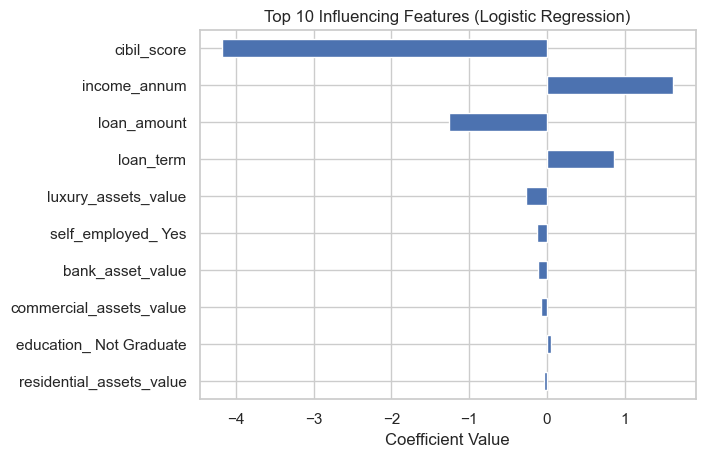

In [99]:
import pandas as pd
import numpy as np
coefficients = pd.Series(log_model.coef_[0], index=X_train.columns)
coefficients_sorted = coefficients.sort_values(key=abs, ascending=False)

print("Top 10 important features:")
print(coefficients_sorted.head(10))
import matplotlib.pyplot as plt
coefficients_sorted.head(10).plot(kind='barh', title="Top 10 Influencing Features (Logistic Regression)")
plt.gca().invert_yaxis()
plt.xlabel("Coefficient Value")
plt.show()


In [ ]:
_